This notebook explores the [NASA JPL Asteroid Dataset](https://www.kaggle.com/sakhawat18/asteroid-dataset) using machine learning techniques to create a model to predict whether asteoirds are potentially hazardous or not. The notebook covers the following aspects of machine learning:
1. Data Exploration
2. Data Wrangling
3. Data Preprocessing
4. ML Model Developing
5. Conclusion

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
# Import data to dataframe
data = pd.read_csv('dataset.csv')

c:\Users\muhil\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# 1. Data Exploration

In this section we shall explore the columns of the dataframe and analyse them accordingly.

### Basic Column Definition from the [JPL website](https://ssd.jpl.nasa.gov/sbdb_query.cgi)
* SPK-ID: Object primary SPK-ID
* Object ID: Object internal database ID
* Object fullname: Object full name/designation
* pdes: Object primary designation
* name: Object IAU name
* NEO: Near-Earth Object (NEO) flag
* PHA: Potentially Hazardous Asteroid (PHA) flag
* H: Absolute magnitude parameter
* Diameter: object diameter (from equivalent sphere) km Unit
* Albedo: Geometric albedo
* Diameter_sigma: 1-sigma uncertainty in object diameter km Unit
* Orbit_id: Orbit solution ID
* Epoch: Epoch of osculation in modified Julian day form
* Equinox: Equinox of reference frame
* e: Eccentricity
* a: Semi-major axis au Unit
* q: perihelion distance au Unit
* i: inclination; angle with respect to x-y ecliptic plane
* tp: Time of perihelion passage TDB Unit
* moid_ld: Earth Minimum Orbit Intersection Distance au Unit

In [3]:
pd.set_option('display.max_columns', 500)
data.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,albedo,diameter_sigma,orbit_id,epoch,epoch_mjd,epoch_cal,equinox,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,cal
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,0.0900,0.200,JPL 47,2458600.5,58600,20190427,J2000,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,2.979647,0.213885,2458238.754,20180430.25,1683.145703,4.608202,1.59478,620.640533,4.820000e-12,1.030000e-11,1.960000e-11,4.610000e-09,6.170000e-08,6.620000e-08,7.820000e-09,1.110000e-11,1.200000e-12,3.780000e-08,9.420000e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,0.1010,18.000,JPL 37,2459000.5,59000,20200531,J2000,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,3.411748,0.213345,2458320.962,20180721.46,1687.410992,4.619880,1.23429,480.348639,3.190000e-08,4.030000e-09,8.830000e-08,3.470000e-06,6.270000e-06,9.130000e-06,8.860000e-06,4.960000e-09,4.650000e-10,4.080000e-05,3.680000e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,0.2140,10.594,JPL 112,2459000.5,59000,20200531,J2000,0.256936,2.668285,1.982706,12.991043,169.851483,248.066193,125.435355,3.353865,0.226129,2458445.792,20181123.29,1592.013769,4.358696,1.03429,402.514639,3.050000e-08,3.470000e-09,8.140000e-08,3.220000e-06,1.660000e-05,1.770000e-05,8.110000e-06,4.360000e-09,4.410000e-10,3.530000e-05,3.110000e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,0.4228,0.200,JPL 35,2458600.5,58600,20190427,J2000,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,2.570926,0.271609,2458247.560,20180509.06,1325.432763,3.628837,1.13948,443.451432,2.330000e-10,1.510000e-09,1.930000e-09,2.170000e-07,3.880000e-07,1.790000e-07,1.210000e-06,1.650000e-09,2.610000e-10,4.100000e-06,1.270000e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,0.2740,3.140,JPL 114,2459000.5,59000,20200531,J2000,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,3.065455,0.238661,2458925.723,20200317.22,1508.414421,4.129814,1.09575,426.433027,2.370000e-08,3.970000e-09,6.090000e-08,2.740000e-06,2.890000e-05,2.980000e-05,8.300000e-06,4.730000e-09,5.520000e-10,3.470000e-05,3.490000e-06,MBA,0.52191


In [4]:
data.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'diameter', 'albedo', 'diameter_sigma', 'orbit_id', 'epoch',
       'epoch_mjd', 'epoch_cal', 'equinox', 'e', 'a', 'q', 'i', 'om', 'w',
       'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'cal'],
      dtype='object')

In [5]:
data.describe()

,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,cal
count,9.585240e+05,952261.000000,136209.000000,135103.000000,136081.000000,9.585240e+05,958524.000000,9.585240e+05,958524.000000,958524.000000,958524.000000,958524.000000,958524.000000,958524.000000,958523.000000,958520.000000,9.585240e+05,9.585240e+05,9.585240e+05,9.585200e+05,9.585230e+05,9.386030e+05,958397.000000,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.385980e+05,9.386020e+05,9.386020e+05,9.385980e+05,958522.000000
mean,3.810114e+06,16.906411,5.506429,0.130627,0.479184,2.458869e+06,58868.781950,2.019693e+07,0.156116,2.902143,2.394887,9.054901,168.456416,181.369457,177.352582,3.455820,2.366846e-01,2.458856e+06,2.019581e+07,5.085344e+03,1.392287e+01,1.415162e+00,539.364207,7.262721e-01,1.541424e+01,1.983462e+01,1.168449e+00,5.310234e+00,1.370627e+06,1.370582e+06,2.131453e+01,5.060221e-02,4.309478e+08,8.527486e+04,0.561153
std,6.831541e+06,1.790405,9.425164,0.110323,0.782895,7.016716e+02,701.671573,1.930354e+04,0.092643,39.719503,2.139246,6.637656,102.881707,103.887995,105.816844,71.769401,7.941705e-02,1.580506e+03,4.337669e+04,2.308961e+06,6.321581e+03,2.156731e+00,834.306975,9.336391e+01,4.392381e+03,2.905651e+03,1.282231e+02,1.333381e+03,9.164038e+08,9.164038e+08,7.197034e+03,9.814953e+00,2.949851e+11,2.767540e+07,2.745700
min,2.000001e+06,-1.100000,0.002500,0.001000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000000,-14702.447870,0.070511,0.007744,0.000024,0.000130,-70.703676,0.653773,1.610000e-07,2.283183e+06,1.539011e+07,1.511918e+02,0.000000e+00,4.540000e-07,0.000000,4.820000e-12,1.030000e-11,1.960000e-11,4.610000e-09,6.170000e-08,6.620000e-08,7.820000e-09,1.110000e-11,1.200000e-12,3.780000e-08,9.420000e-09,0.000000
25%,2.239632e+06,16.100000,2.780000,0.053000,0.180000,2.459000e+06,59000.000000,2.020053e+07,0.092193,2.387835,1.971401,4.165419,80.604399,91.482063,83.785012,2.781603,1.894969e-01,2.458560e+06,2.019032e+07,1.347738e+03,3.689903e+00,9.797020e-01,375.394939,5.470000e-08,2.050000e-08,1.460000e-07,6.100000e-06,3.620000e-05,5.760000e-05,2.570000e-05,2.340000e-08,2.770000e-09,1.110900e-04,1.790000e-05,0.518040
50%,2.479262e+06,16.900000,3.972000,0.079000,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.145002,2.646969,2.225816,7.415665,159.826919,182.358081,175.641078,3.046995,2.288655e-01,2.458945e+06,2.020041e+07,1.572976e+03,4.306571e+00,1.240850e+00,477.706175,8.170000e-08,3.850000e-08,2.270000e-07,8.690000e-06,6.640000e-05,1.047100e-04,4.900000e-05,4.360000e-08,4.640000e-09,2.230800e-04,3.500000e-05,0.566280
75%,3.752518e+06,17.714000,5.765000,0.190000,0.620000,2.459000e+06,59000.000000,2.020053e+07,0.200650,3.001932,2.578315,12.407550,252.247751,271.521589,269.865749,3.364793,2.671142e-01,2.459361e+06,2.021053e+07,1.899765e+03,5.201272e+00,1.593370e+00,617.324804,2.340000e-07,1.040000e-07,6.580000e-07,1.590000e-05,1.609775e-04,3.114400e-04,1.718900e-04,1.200000e-07,1.120000e-08,8.139600e-04,9.780000e-05,0.613927
max,5.401723e+07,33.200000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,1.855356,33488.895950,80.398819,175.082901,359.999793,359.999646,491.618014,66972.796060,2.381082e+00,2.546362e+06,2.259081e+07,2.238462e+09,6.128574e+06,7.947660e+01,30929.908420,3.942500e+04,3.241200e+06,1.020000e+06,5.533000e+04,1.199100e+06,8.850000e+11,8.850000e+11,5.509700e+06,7.698800e+03,2.850000e+14,1.910000e+10,2686.600000


### Analyse columns

Based on the description of the data above, it can be noticed that many features have missing values. Before imputing or eliminating them, we need to first understand the kind of data each feature holds


In [6]:
data.shape

(958524, 45)

In [7]:
#1. id and spkid
print(data['id'].nunique())
print(data['spkid'].nunique())
print(data['full_name'].nunique())
print(data['pdes'].nunique())

958524
958524
958524
958524


No missing values exist in the ateroid identifying columns.

Now analyse all columns of the 'object' datatype

In [8]:
# Potentially hazardous asteroids
data['pha'].value_counts(normalize=True)

N    0.997799
Y    0.002201
Name: pha, dtype: float64

In [9]:
# Near Earth Object
data['neo'].value_counts(normalize=True)

N    0.976114
Y    0.023886
Name: neo, dtype: float64

In [10]:
# Asteroid orbit ID
print(data['orbit_id'].unique())
print(data['orbit_id'].nunique())

['JPL 47' 'JPL 37' 'JPL 112' ... 'E2020H77' 'E2020K86' 'E2020J48']
4690


In [11]:
# Comet Designation prefix
print(data['prefix'].unique())
print(data['prefix'].nunique())

[nan 'A']
1


In [12]:
# Equinox reference
print(data['equinox'].unique())
print(data['equinox'].nunique())

['J2000']
1


In [13]:
# Orbit classification
print(data['class'].unique())
print(data['class'].nunique())

['MBA' 'OMB' 'MCA' 'AMO' 'IMB' 'TJN' 'CEN' 'APO' 'ATE' 'AST' 'TNO' 'IEO'
 'HYA']
13


Columns 'id', 'spkid' and 'full_name' are unique for each row. The 'full_name' column values are split into columns 'pdes' and 'name'. These columns can be removed since they will not facilitate in the analysis. The 'id' column has alphanumeric values whereas column 'spkid' doesn't. So column 'id' can be removed as well. 

Columns 'prefix' and 'equinox' have only one value so they can be eliminated as well.

In [14]:
data1 = data.drop(['id', 'pdes', 'name', 'prefix', 'equinox'], axis='columns', inplace=False)

# 2. Data Wrangling

### Analyse missing values

Most columns have almost no missing values. The 'sigma' columns seems to have missing values for the same number of rows. Although the 'name' column has 97% missing values, it is paired with 'pdes' to make a full name. 

Columns 'diameter', 'albedo' and 'diameter_sigma' have 85% missing values. Since these values cannot be measured or derived, these columns can be removed.

Columns 'pha', 'moid' and those with the 'sigma' prefix columns have missing values for the same rows where 'pha' is missing data. Since its only 2% of the data, we can keep remove these entries.

In [15]:
asteroid_df = data1[data1['pha'].notna()]
asteroid_df = asteroid_df.drop(['diameter', 'albedo', 'diameter_sigma'], axis= 'columns')

There are a few values missing in column 'H' - absolute magnitude. This can be determined using albedo and diameter but since those columns no longer exist, we can remove the rows with missing 'H' values.

In [16]:
asteroid_df = asteroid_df[asteroid_df['H'].notna()]

Remove the remaining missing row values using column 'sigma_ad' since it seems to have the most number of missing values.

In [17]:
asteroid_df = asteroid_df[asteroid_df['sigma_ad'].notna()]
asteroid_df = asteroid_df[asteroid_df['ma'].notna()] # Remove row with the one missing value for 'ma'

### Columns Data Types

Certain column types will need to be changed for the machine learning models to use. Machine Learning models will not be able to process <br> 
Convert columns 'neo', 'pha' and 'class' to categorical variables.

In [18]:
asteroid_df['neo'] = asteroid_df['neo'].astype('category')
asteroid_df['pha'] = asteroid_df['pha'].astype('category')
asteroid_df['class'] = asteroid_df['class'].astype('category')

These categories can be further analysed to understand their distribution by answering questions pertinent to their features.

In [19]:
# What percent of asteroids are near earth objects?

asteroid_df['neo'].value_counts(normalize=True)*100

N    97.545625
Y     2.454375
Name: neo, dtype: float64

In [20]:
# Of the near earth objects, what percent of them are potentially hazardous asteroids?

asteroid_df[asteroid_df['neo']=='Y']['pha'].value_counts(normalize=True)*100

N    90.971464
Y     9.028536
Name: pha, dtype: float64

In [21]:
# How many asteroids of the dataset are potentially hazardous asteroids?

asteroid_df['pha'].value_counts(normalize=True)*100

N    99.778406
Y     0.221594
Name: pha, dtype: float64

In [22]:
# Of the potentially hazardous asteroids, what percent of them are near earth objects?

asteroid_df[asteroid_df['pha']=='Y']['neo'].value_counts(normalize=True)*100

Y    100.0
N      0.0
Name: neo, dtype: float64

In [23]:
# What is the distribution of the orbit classification?

asteroid_df['class'].value_counts(normalize=True)*100

MBA    89.308028
OMB     2.914189
IMB     2.113189
MCA     1.908005
APO     1.360455
AMO     0.906112
TJN     0.871146
TNO     0.371004
ATE     0.185448
CEN     0.053951
AST     0.006114
IEO     0.002360
Name: class, dtype: float64

In [24]:
# How many orbit IDs exist?

asteroid_df['orbit_id'].nunique()

525

Of the data set of asteroids provided, 99.7% of the asteroids are non-hazardous. All the potentially hazardous asteroids are near earth objects (neo). On the other hand, only 9% of the near earth objects are hazardous. 

Our focus is to predict if an asteroid is potentially hazardous. 

# 3. Data Preprocessing

Before creating machine learning models, it is imperative to make sure the data being provided isn't cumbersome. For example, the 'orbit_id' feature has 525 unique catergories to identify the asteroid's orbit. We can reduce this number by analysing the less occuring orbit IDs.

In [25]:
# Number of orbit_id that have less than 10 occurances
orbits = asteroid_df['orbit_id'].value_counts().loc[lambda x: x<10].index.to_list()

In [26]:
len(orbits)

331

There are 331 orbit ids that occur less than 10 times. We can replace these orbit ids by renaming them as 'others' so there is no loss of data.

In [27]:
asteroid_df.loc[asteroid_df['orbit_id'].isin(orbits), 'orbit_id'] = 'other'

The data needs to be normalised before using it to train models, so all the numeric features need to be on the same scale. For this we use min-max scaler.

In [28]:
# Reset the index
asteroid_df = asteroid_df.reset_index(drop=True)

In [29]:
# Create a subset of only numerical columns to scale
subset_df = asteroid_df[asteroid_df.columns[~asteroid_df.columns.isin(['spkid', 'full_name', 'neo', 'pha', 'orbit_id', 'class'])]]

In [30]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(subset_df)
scaled_df = pd.DataFrame(scaled_df, columns=subset_df.columns)
asteroid_df = pd.concat([asteroid_df[['spkid', 'full_name', 'neo', 'pha', 'orbit_id', 'class']],scaled_df], axis=1)
scaled_df.head()

,H,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,cal
0,0.131195,0.988218,0.988218,0.989134,0.076017,0.000066,0.030975,0.060467,0.223071,0.204438,0.258627,0.000035,0.089827,0.665157,0.665258,6.843780e-07,6.843780e-07,0.020066,0.020066,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000161
1,0.154519,1.000000,1.000000,1.000000,0.230004,0.000066,0.025712,0.198916,0.480625,0.861674,0.379616,0.000041,0.089600,0.665470,0.665298,6.862835e-07,6.862835e-07,0.015530,0.015530,8.090090e-13,1.240189e-15,8.654941e-14,6.263130e-11,5.177466e-12,2.713713e-16,2.650353e-16,8.982159e-16,6.024315e-14,3.919442e-18,1.921770e-16,0.000134
2,0.187464,1.000000,1.000000,1.000000,0.256972,0.000063,0.023805,0.074158,0.471810,0.689073,0.344645,0.000040,0.094969,0.665944,0.665354,6.436662e-07,6.436662e-07,0.013014,0.013014,7.734985e-13,1.067413e-15,7.978471e-14,5.811296e-11,1.379226e-11,5.279581e-16,2.425802e-16,7.893170e-16,5.712579e-14,3.390596e-18,1.623340e-16,0.000126
3,0.119534,0.988218,0.988218,0.989134,0.088732,0.000054,0.025911,0.040748,0.288363,0.418691,0.291718,0.000029,0.114070,0.665191,0.665269,5.245750e-07,5.245750e-07,0.014337,0.014337,5.787698e-15,4.626990e-16,1.872941e-15,3.838605e-12,2.721208e-13,3.377246e-18,3.599341e-17,2.974572e-16,3.374552e-14,3.905962e-19,6.599895e-17,0.000149
4,0.233236,1.000000,1.000000,1.000000,0.190939,0.000060,0.025049,0.030614,0.393253,0.996247,0.152094,0.000036,0.100232,0.667768,0.668020,6.063194e-07,6.063194e-07,0.013787,0.013787,6.010192e-13,1.221677e-15,5.968667e-14,4.943774e-11,2.404995e-11,8.902335e-16,2.482689e-16,8.564713e-16,7.154362e-14,3.332904e-18,1.822293e-16,0.000194


Convert the categorical columns 'neo' and 'class' and object column 'orbit_id' into one-hot encoding variables.

In [31]:
# 1. Create one-hot encoding columns using get_dummies
asteroid_df1 = pd.get_dummies(asteroid_df, columns=['neo', 'class', 'orbit_id'])
asteroid_df1.head()

,spkid,full_name,pha,H,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,cal,neo_N,neo_Y,class_AMO,class_APO,class_AST,class_ATE,class_CEN,class_IEO,class_IMB,class_MBA,class_MCA,class_OMB,class_TJN,class_TNO,orbit_id_1,orbit_id_10,orbit_id_101,orbit_id_103,orbit_id_104,orbit_id_11,orbit_id_12,orbit_id_13,orbit_id_14,orbit_id_15,orbit_id_16,orbit_id_17,orbit_id_18,orbit_id_19,orbit_id_2,orbit_id_20,orbit_id_21,orbit_id_22,orbit_id_23,orbit_id_24,orbit_id_25,orbit_id_26,orbit_id_27,orbit_id_28,orbit_id_29,orbit_id_3,orbit_id_30,orbit_id_31,orbit_id_32,orbit_id_33,orbit_id_34,orbit_id_35,orbit_id_36,orbit_id_37,orbit_id_38,orbit_id_39,orbit_id_4,orbit_id_40,orbit_id_41,orbit_id_42,orbit_id_43,orbit_id_44,orbit_id_45,orbit_id_46,orbit_id_47,orbit_id_48,orbit_id_49,orbit_id_5,orbit_id_50,orbit_id_51,orbit_id_52,orbit_id_53,orbit_id_54,orbit_id_55,orbit_id_56,orbit_id_57,orbit_id_58,orbit_id_59,orbit_id_6,orbit_id_60,orbit_id_61,orbit_id_62,orbit_id_63,orbit_id_64,orbit_id_65,orbit_id_66,orbit_id_67,orbit_id_68,orbit_id_69,orbit_id_7,orbit_id_70,orbit_id_71,orbit_id_72,orbit_id_73,orbit_id_74,orbit_id_75,orbit_id_76,orbit_id_77,orbit_id_8,orbit_id_80,orbit_id_81,orbit_id_82,orbit_id_83,orbit_id_85,orbit_id_86,orbit_id_87,orbit_id_88,orbit_id_89,orbit_id_9,orbit_id_91,orbit_id_94,orbit_id_95,orbit_id_99,orbit_id_JPL 1,orbit_id_JPL 10,orbit_id_JPL 100,orbit_id_JPL 102,orbit_id_JPL 103,orbit_id_JPL 105,orbit_id_JPL 106,orbit_id_JPL 107,orbit_id_JPL 108,orbit_id_JPL 11,orbit_id_JPL 110,orbit_id_JPL 117,orbit_id_JPL 12,orbit_id_JPL 13,orbit_id_JPL 14,orbit_id_JPL 15,orbit_id_JPL 16,orbit_id_JPL 17,orbit_id_JPL 18,orbit_id_JPL 19,orbit_id_JPL 2,orbit_id_JPL 20,orbit_id_JPL 21,orbit_id_JPL 22,orbit_id_JPL 23,orbit_id_JPL 24,orbit_id_JPL 25,orbit_id_JPL 26,orbit_id_JPL 27,orbit_id_JPL 28,orbit_id_JPL 29,orbit_id_JPL 3,orbit_id_JPL 30,orbit_id_JPL 31,orbit_id_JPL 32,orbit_id_JPL 33,orbit_id_JPL 34,orbit_id_JPL 35,orbit_id_JPL 36,orbit_id_JPL 37,orbit_id_JPL 38,orbit_id_JPL 39,orbit_id_JPL 4,orbit_id_JPL 40,orbit_id_JPL 41,orbit_id_JPL 42,orbit_id_JPL 43,orbit_id_JPL 44,orbit_id_JPL 45,orbit_id_JPL 46,orbit_id_JPL 47,orbit_id_JPL 48,orbit_id_JPL 49,orbit_id_JPL 5,orbit_id_JPL 50,orbit_id_JPL 51,orbit_id_JPL 52,orbit_id_JPL 53,orbit_id_JPL 54,orbit_id_JPL 55,orbit_id_JPL 56,orbit_id_JPL 57,orbit_id_JPL 58,orbit_id_JPL 59,orbit_id_JPL 6,orbit_id_JPL 60,orbit_id_JPL 61,orbit_id_JPL 62,orbit_id_JPL 63,orbit_id_JPL 64,orbit_id_JPL 65,orbit_id_JPL 66,orbit_id_JPL 67,orbit_id_JPL 68,orbit_id_JPL 69,orbit_id_JPL 7,orbit_id_JPL 70,orbit_id_JPL 71,orbit_id_JPL 72,orbit_id_JPL 73,orbit_id_JPL 74,orbit_id_JPL 75,orbit_id_JPL 76,orbit_id_JPL 77,orbit_id_JPL 78,orbit_id_JPL 79,orbit_id_JPL 8,orbit_id_JPL 80,orbit_id_JPL 81,orbit_id_JPL 82,orbit_id_JPL 83,orbit_id_JPL 84,orbit_id_JPL 86,orbit_id_JPL 87,orbit_id_JPL 9,orbit_id_JPL 91,orbit_id_JPL 94,orbit_id_JPL 96,orbit_id_JPL 97,orbit_id_JPL 98,orbit_id_JPL 99,orbit_id_other
0,2000001,1 Ceres,N,0.131195,0.988218,0.988218,0.989134,0.076017,0.000066,0.030975,0.060467,0.223071,0.204438,0.258627,0.000035,0.089827,0.665157,0.665258,6.843780e-07,6.843780e-07,0.020066,0.020066,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000161,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2000002,2 Pallas,N,0.154519,1.000000,1.000000,1.000000,0.230004,0.000066,0.025712,0.198916,0.480625,0.861674,0.379616,0.000041,0.089600,0.665470,0.665298,6

# 4. ML Model Developing

Now that the data is ready to be modeled, there are a wide range of algorithms that can be put to use. The goal is to predict if an asteroid is potentially hazardous or not. For this classification problem, we can use the following algorithms.

1. Logistic Regression
2. Random Forest
3. Light Gradient Boosting

The best performing model can then be selected as a winner to conduct reliable predictions.

Before developing the models, we need to create the train and test sets. Remove 'spkid' and 'full_name' since it will not be required in the data modelling. The feature 'pha' will be used as label alone.

In [32]:
from sklearn.model_selection import train_test_split

X = asteroid_df1.drop(['spkid', 'full_name', 'pha'], axis=1)
y = asteroid_df1.iloc[:]['pha']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1501)

The data is highly imbalanced with over 99% of the data belonging to the negative class. This could sway the models and predict only the negative class for any input. For this reason, its best to oversample the positive class and create an equal sample numbers for both classes. This is achieved by usig the library [SMOTE](https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html).

In [33]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of label 'N': {}".format(sum(y_train == 'N')))
print("Before OverSampling, counts of label 'Y': {} \n".format(sum(y_train == 'Y')))

sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print("After OverSampling, counts of label 'N': {}".format(sum(y_train_res == 'N')))
print("After OverSampling, counts of label 'Y': {}".format(sum(y_train_res == 'Y')))



Before OverSampling, counts of label 'N': 651221
Before OverSampling, counts of label 'Y': 1413 

After OverSampling, counts of label 'N': 651221
After OverSampling, counts of label 'Y': 651221


Create a function to calculate the metrics of each model.

In [34]:
def metricCalculation(y_test, pred):
    
    precision_metric = metrics.precision_score(y_test, pred, average = "macro")
    recall_metric = metrics.recall_score(y_test, pred, average = "macro")
    accuracy_metric = metrics.accuracy_score(y_test, pred)
    f1_metric = metrics.f1_score(y_test, pred, average = "macro")
    print('Precision metric:',round(precision_metric, 2))
    print('Recall Metric:',round(recall_metric, 2))
    print('Accuracy Metric:',round(accuracy_metric, 4))
    print('F1 score:',round(f1_metric, 2))

### 1. Logistic Regression

Logistic Regression will be the baseline model for the dataset. Using the metrics from this model, we can compare metrics from the other models and tune them to achieve better values.

In [35]:
# Import the model
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logisticRegr = LogisticRegression(max_iter= 10000) # create object for the class

# Fit to train model with features and labels
logisticRegr.fit(x_train_res, y_train_res)

# Predict for test set
lr_pred = logisticRegr.predict(x_test)

In [36]:
# Calculate metrics
metricCalculation(y_test, lr_pred)

Precision metric: 0.6
Recall Metric: 0.98
Accuracy Metric: 0.9911
F1 score: 0.67


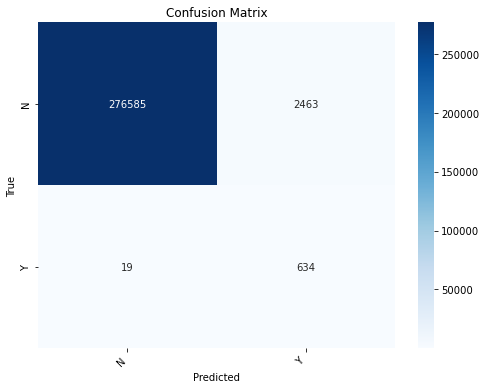

In [37]:
# Print confusion matrix
# print(metrics.confusion_matrix(y_test, lr_pred))

# Define the labels
labels = ['N', 'Y']  

# Define the true labels and predicted labels
true_labels = y_test  # Replace with your actual true labels
predicted_labels = lr_pred  # Replace with your actual predicted labels

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# Rotate tick labels for better readability (optional)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Show the plot
plt.show()

Although the accuracy and recall of the model is high, the precision metric and F1 score paint a different picture. The low F1 score and precision prove that the model doesn't classify well and has a poor balance between the two classes. Based on the confusion matrix alone, we notice a high number of false positives. The power of the logistic regression model isn't strong enough to predict the nature of the asteroids.

### 2. Random Forest

Random Forest is known to elimiate the chance of overfitting and with the help of its ensamble method, it could be a better classifier than logisitic regression. 

In [38]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 150 decision trees
rf = RandomForestClassifier(n_estimators = 150, random_state = 1551)

# Train the model on training data
rf.fit(x_train_res, y_train_res)

# Predict for test set
rf_pred = rf.predict(x_test)

In [39]:
# Calculate metrics
metricCalculation(y_test, rf_pred)

Precision metric: 0.97
Recall Metric: 0.99
Accuracy Metric: 0.9998
F1 score: 0.98


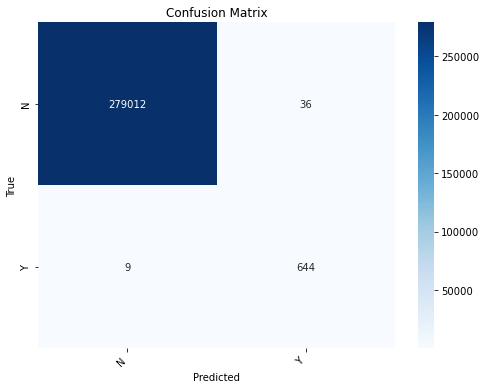

In [40]:
# Confusion matrix
# print(metrics.confusion_matrix(y_test, rf_pred))

# Define the labels
labels = ['N', 'Y']  

# Define the true labels and predicted labels
true_labels = y_test  # Replace with your actual true labels
predicted_labels = rf_pred  # Replace with your actual predicted labels

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# Rotate tick labels for better readability (optional)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Show the plot
plt.show()


The random forest classifier has a higher F-score and precision than the logistic regression, proving that its a better model for identifying the nature of an asteroid. Using this model, we can identify the most important features that help in determining the type of asteroid.

In [41]:
feature_imp = pd.DataFrame(rf.feature_importances_,index=x_train_res.columns, columns = ['Importance']).sort_values(by='Importance', ascending=False)

In [42]:
# Top 10 important variables
feature_imp[0:10]

,Importance
moid_ld,0.161852
neo_N,0.136462
neo_Y,0.121429
q,0.120644
moid,0.109661
e,0.081379
class_MBA,0.075157
H,0.065467
n,0.047595
class_APO,0.039467


Based on the Random Forest model, the most important feature is the Earth Minimum Orbit Intersection Distance (moid_id) followed by identifying if the object in question is a near earth object (neo) or not. 

In [43]:
# 10 least important features
feature_imp[-10:]

,Importance
orbit_id_JPL 108,3.621609e-14
orbit_id_JPL 99,3.291792e-14
orbit_id_JPL 106,2.380364e-14
orbit_id_JPL 110,0.000000e+00
sigma_ma,0.000000e+00
orbit_id_JPL 63,0.000000e+00
orbit_id_JPL 56,0.000000e+00
sigma_tp,0.000000e+00
orbit_id_JPL 74,0.000000e+00
orbit_id_JPL 82,0.000000e+00


In [44]:
feature_imp[-50:].index

Index(['orbit_id_JPL 59', 'orbit_id_JPL 83', 'orbit_id_101', 'orbit_id_55',
       'orbit_id_JPL 50', 'orbit_id_JPL 86', 'orbit_id_JPL 71',
       'orbit_id_JPL 53', 'orbit_id_JPL 61', 'orbit_id_JPL 57', 'orbit_id_88',
       'orbit_id_JPL 102', 'orbit_id_JPL 52', 'orbit_id_56', 'orbit_id_74',
       'orbit_id_94', 'orbit_id_JPL 54', 'orbit_id_JPL 64', 'orbit_id_JPL 66',
       'orbit_id_JPL 103', 'orbit_id_JPL 38', 'orbit_id_JPL 69',
       'orbit_id_JPL 65', 'orbit_id_JPL 81', 'orbit_id_JPL 58',
       'orbit_id_JPL 84', 'orbit_id_60', 'orbit_id_JPL 32', 'orbit_id_JPL 105',
       'sigma_w', 'class_AST', 'orbit_id_JPL 48', 'orbit_id_86',
       'orbit_id_JPL 91', 'orbit_id_JPL 73', 'orbit_id_JPL 97',
       'orbit_id_JPL 77', 'orbit_id_81', 'orbit_id_JPL 43', 'orbit_id_JPL 46',
       'orbit_id_JPL 108', 'orbit_id_JPL 99', 'orbit_id_JPL 106',
       'orbit_id_JPL 110', 'sigma_ma', 'orbit_id_JPL 63', 'orbit_id_JPL 56',
       'sigma_tp', 'orbit_id_JPL 74', 'orbit_id_JPL 82'],
      dt

Upon further exploring the least important features, it can be seen that the orbit IDs do not contribute much to the model. The dataset can be modified by eliminating the orbit_id feature completely. Similarly we can also elimate the features 'sigma_ma' and 'sigma_tp' that have 0 importance.

To do this, create a new dataset with one-hot encoding and dropping the orbit_id column.

In [45]:
asteroid_df2 = pd.get_dummies(asteroid_df, columns=['neo', 'class'])
asteroid_df2.drop(['orbit_id','sigma_ma', 'sigma_tp'], axis='columns', inplace=True)

In [46]:
# Create train test splits 

X1 = asteroid_df2.drop(['spkid', 'full_name', 'pha'], axis=1)
y1 = asteroid_df2.iloc[:]['pha']

x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.30, random_state=1501)

In [47]:
sm = SMOTE(random_state=12)
x_train_res1, y_train_res1 = sm.fit_resample(x_train1, y_train1.ravel())

print("After OverSampling, counts of label 'N': {}".format(sum(y_train_res1 == 'N')))
print("After OverSampling, counts of label 'Y': {}".format(sum(y_train_res1 == 'Y')))


After OverSampling, counts of label 'N': 651221
After OverSampling, counts of label 'Y': 651221


In [48]:
# Instantiate model with 150 decision trees
rf = RandomForestClassifier(n_estimators = 150, random_state = 1551)

# Train the model on training data
rf.fit(x_train_res1, y_train_res1)

# Predict for test set
rf_pred1 = rf.predict(x_test1)

In [49]:
# Calculate metrics
metricCalculation(y_test, rf_pred1)

Precision metric: 0.98
Recall Metric: 1.0
Accuracy Metric: 0.9999
F1 score: 0.99


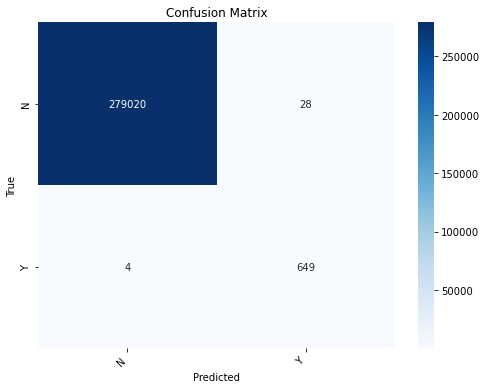

In [50]:
# print(metrics.confusion_matrix(y_test, rf_pred))

# Define the labels
labels = ['N', 'Y']  

# Define the true labels and predicted labels
true_labels = y_test  # Replace with your actual true labels
predicted_labels = rf_pred1  # Replace with your actual predicted labels

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# Rotate tick labels for better readability (optional)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Show the plot
plt.show()


As can be seen, the model performance has improved with fewer false positives and false negatives. Thus, Random Forest can be used as a reliable model to predict the nature of the asteroid.

### 3. Light Gradient Boosting

Gradient Boosting Model (GBM) is a model better preferred for prediction since it combines the principles of gradient decsent and the randomness of decision trees. We can expect a better performing model with GBM, as compared to Random Forest. Due to the massive size of the data, we can choose Light Gradient Boosting model which is known for its quick performance when compared to XGBoosting.

This algorithm will be used on 2 datasets - one with all the features and one without the important features as identified by the Random Forest model.

### 3.1 LGBM with entire data set

For the sake of LGBM, convert the labels into numeric values by substituting Y with 1 and N with 0

In [51]:
# Duplicate the training data sets for the label
y_train_res_2 = y_train_res

In [52]:
# Encode labels

for n,i in enumerate(y_train_res_2):
    if i=='Y':
      y_train_res_2[n] = 1
    else:
        y_train_res_2[n] = 0

In [53]:
# Use label encoding to encode test labels 
y_test_2 = y_test.cat.codes

In [54]:
# Load the training dataset along with the label to LGBM
import lightgbm as lgb 

train_data=lgb.Dataset(x_train_res,label=y_train_res_2)

Set paramateres before fitting the model. After experimenting with a few learning rates, it was found that a rate of 0.01 yeilded the highest value for precision although all other metrics remained almost the same. 

In [55]:
#setting parameters for lightgbm

param = {'num_leaves': 150, # number of leaves per tree
         'nrounds': 350,
         'max_depth': 25, # depth of tree
         'learning_rate': 0.01, # learning rate
         'max_bin': 500 # max number of bins to bucket the feature values.
        }

In [56]:
# Train the model 

lgbm = lgb.train(param, train_data)
lgbm_pred = lgbm.predict(x_test)

# Convert the predicted probabilities to 0 or 1
for i in range(0,len(y_test_2)):
    if lgbm_pred[i]>=.5:       # setting threshold to .5
       lgbm_pred[i]=1
    else:  
       lgbm_pred[i]=0

[LightGBM] [Warning] Unknown parameter: nrounds
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Unknown parameter: nrounds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.193932 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15832
[LightGBM] [Info] Number of data points in the train set: 1302442, number of used features: 197
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [57]:
# Calculate metrics
metricCalculation(y_test_2, lgbm_pred)

Precision metric: 0.96
Recall Metric: 0.99
Accuracy Metric: 0.9998
F1 score: 0.98


In [58]:
# # Confusion Matrix
# print(metrics.confusion_matrix(y_test_2, lgbm_pred))

# Define the labels
labels = ['N', 'Y']  

# Define the true labels and predicted labels
true_labels = y_test  # Replace with your actual true labels
predicted_labels = lgbm_pred  # Replace with your actual predicted labels

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# Rotate tick labels for better readability (optional)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Show the plot
plt.show()


TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=['N' 'Y'] and y_pred=[0. 1.]. Make sure that the predictions provided by the classifier coincides with the true labels.

The Light Gradient Boosting Model with the entire dataset has higher metric values as compared to Logistic Regression but a little lower than Random Forest. The confusion matrix shows that the LGBM has more mislabled values than the Random Forest model. Now we try training the model on the trimmed data set based on the importance of the Random Forest model.

### 3.2 LGBM with trimmed data

Convert the labels into numeric values by substituting Y with 1 and N with 0

In [ ]:
# Duplicate the training data sets for the label
y_train_res_3 = y_train_res1

# Encode labels

for n,i in enumerate(y_train_res_3):
    if i=='Y':
      y_train_res_3[n] = 1
    else:
        y_train_res_3[n] = 0
        
# Use label encoding to encode test labels 
y_test_3 = y_test1.cat.codes

In [ ]:
# Load the training dataset along with the label to LGBM
import lightgbm as lgb 

train_data_1=lgb.Dataset(x_train_res1,label=y_train_res_3)

We use the same parameters for the model.

In [ ]:
# Train the model 

lgbm_1 = lgb.train(param, train_data_1)
lgbm_pred_1 = lgbm_1.predict(x_test1)

# Convert the predicted probabilities to 0 or 1
for i in range(0,len(y_test_3)):
    if lgbm_pred_1[i]>=.5:       # setting threshold to .5
       lgbm_pred_1[i]=1
    else:  
       lgbm_pred_1[i]=0

[LightGBM] [Warning] Unknown parameter: nrounds
[LightGBM] [Warning] Unknown parameter: nrounds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.473914 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14528
[LightGBM] [Info] Number of data points in the train set: 1302442, number of used features: 43
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

In [ ]:
# Calculate metrics
metricCalculation(y_test_3, lgbm_pred_1)

Precision metric: 0.96
Recall Metric: 0.99
Accuracy Metric: 0.9998
F1 score: 0.98


In [ ]:
# Confusion Matrix
# print(metrics.confusion_matrix(y_test_3, lgbm_pred_1))

# Define the labels
labels = ['N', 'Y']  

# Define the true labels and predicted labels
true_labels = y_test  # Replace with your actual true labels
predicted_labels = lgbm_pred_1  # Replace with your actual predicted labels

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)

# Set labels, title, and ticks
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# Rotate tick labels for better readability (optional)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Show the plot
plt.show()


[[278992     56]
 [    10    643]]


The model with the trimmed data is a definite improvement although it isn't as good as the prediciton by Random Forest, since it still has more mislabeled asteoroids. LGBM ranks second in model performance. 

# 5. Conclusion

Following is the table of performance evaluation for the models created.


| Model| Accuracy  | Precision    | Recall   | F-1 Score   |
|---:|:-------------|:-----------|:------|:------|
| Random Forest with importance | 99.99%  | 0.98    | 1.0   | 0.99     |
| Random Forest | 99.98%  | 0.97   | 0.99   | 0.98     |
| Light Gradient Boosting with importance | 99.98%  | 0.96    | 0.99   | 0.98     |
| Light Gradient Boosting | 99.98%  |  0.96  |  0.99  |   0.98   |
| Logistic Regression |  99.11% | 0.6       | 0.98   | 0.67     |

The Random Forest model with only important features trumps the other models in perfomance metrics. Light Gradient Boosting had a good performance as well, but not as good as Random Forest, even with the model tuned for different paramters. Logistic Regression was used a baseline model to match the other models with, and although it had good accuracy, it still was weak in performance. <br>

Thus a tuned Random Forest model would be best to predict the hazardous nature of the asteroids. 